# 1. Знакомимся с данными

✍ В этом модуле мы познакомимся с агрегатными функциями.

И помогут нам в этом... покемоны! Как? Да очень просто!

На протяжении всего модуля мы будем работать с таблицей sql.pokemon, содержащей данные о покемонах и их характеристиках из классических видеоигр.

Давайте познакомимся с нашими покемонами и данными о них!

Присмотримся к содержимому таблицы sql.pokemon: в ней хранится информация о покемонах.

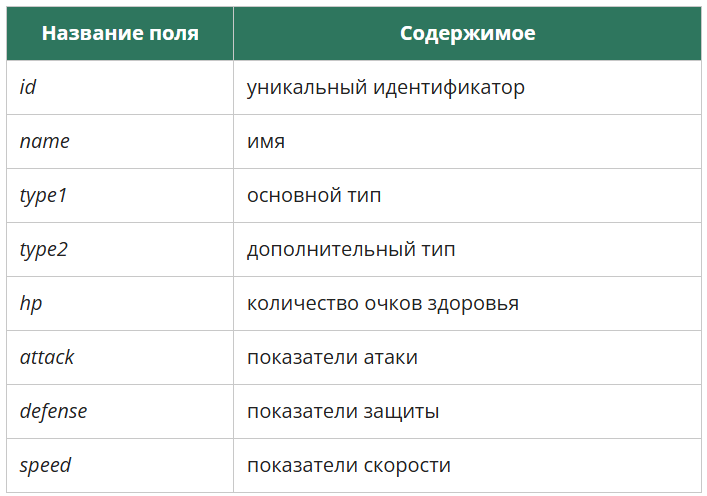

# 2. Убираем повторяющиеся значения

Примечание. Как и в предыдущем модуле, вы можете посмотреть подробный разбор структуры предлагаемых запросов во вкладке Детализация.

Для начала получим все основные типы покемонов.

In [ ]:
SELECT /*выбор*/
    type1 /*столбец type1*/
FROM sql.pokemon /*из таблицы sql.pokemon*/

Видно, что типы повторяются, потому что в результате запроса вы получаете все строки, которые подходят под заданные условия.

Чтобы получить уникальные значения из столбца, воспользуемся ключевым словом DISTINCT.

In [ ]:
SELECT DISTINCT type1 /*уникальные значения type1*/
FROM sql.pokemon
ORDER BY type1 /*сортировка по type1*/

Мы можем применять DISTINCT и для нескольких столбцов.
Получим, например, все уникальные пары основного и дополнительного типов для покемонов.

In [ ]:
SELECT DISTINCT type1, type2
FROM sql.pokemon
ORDER BY type1, type2

На скриншоте ниже представлен фрагмент вывода по нашему запросу.

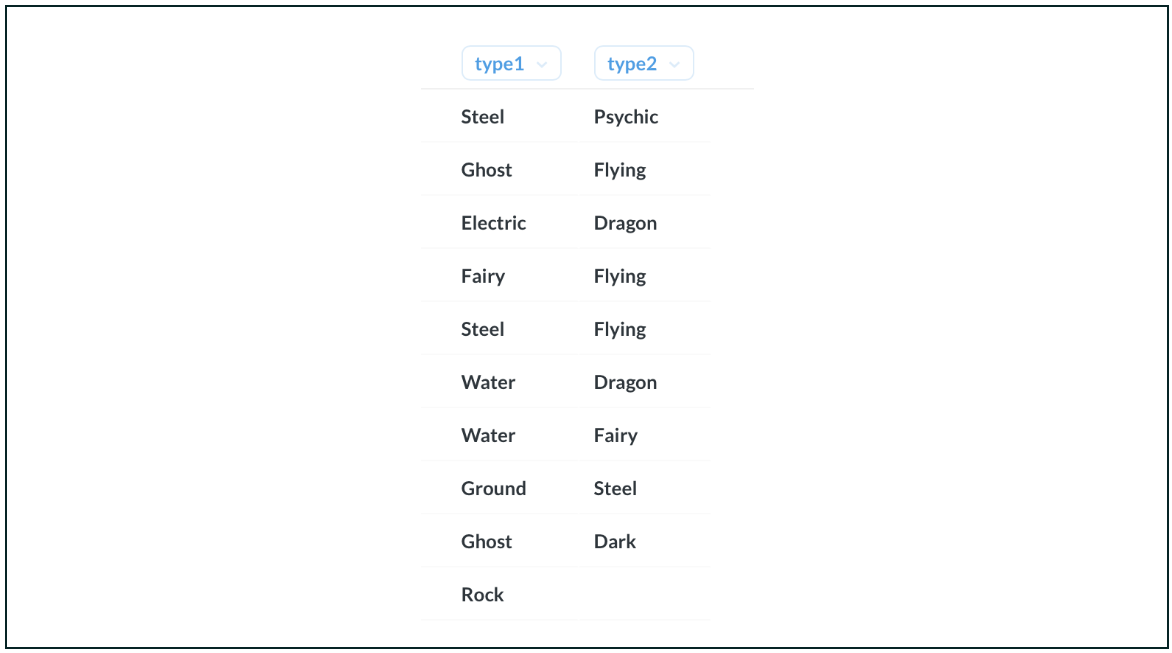

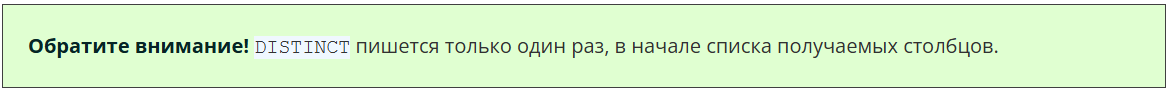

# 3. Агрегатные функции

✍ Кроме простых математических операций, которые мы использовали в предыдущем модуле, СУБД позволяет проводить статистические вычисления для нескольких строк.

Давайте посчитаем количество строк в таблице. Для этого применим агрегатную функцию COUNT.

In [ ]:
SELECT
    COUNT(*)
FROM sql.pokemon /*количество строк в таблице sql.pokemon*/

Если в аргументе функции указать название столбца, функция обработает только строки с непустым значением.

Сколько покемонов имеет дополнительный тип?

In [ ]:
SELECT
    COUNT(type2)
FROM sql.pokemon /*количество строк с заполненным столбцом type2*/

Внутри функции COUNT мы можем также применять DISTINCT, чтобы вычислить количество уникальных значений.

In [ ]:
SELECT
    COUNT(DISTINCT type1)
FROM sql.pokemon

In [ ]:
SELECT /*выбор*/
    COUNT(DISTINCT type1) /*функция подсчёта строк; уникальные значения столбца type1*/
FROM sql.pokemon /*из таблицы sql.pokemon*/

### Основные агрегатные функции

Назовём основные агрегатные функции, с которыми нам предстоит работать:

- COUNT — вычисляет число непустых строк;
- SUM — вычисляет сумму;
- AVG — вычисляет среднее;
- MAX — вычисляет максимум;
- MIN — вычисляет минимум.

Найдите максимальное значение атаки среди всех покемонов.

In [ ]:
SELECT
max(attack)
FROM sql.pokemon

Какое среднее количество очков здоровья у покемонов-драконов (то есть тех, у кого основной тип — Dragon)?

In [ ]:
SELECT
avg(hp)
FROM sql.pokemon
WHERE type1 = 'Dragon'

Кроме того, мы можем применять несколько агрегатных функций в одном запросе.

In [ ]:
SELECT
    COUNT(*) AS "всего травяных покемонов",
    COUNT(type2) AS "покемонов с дополнительным типом",
    AVG(attack) AS "средняя атака",
    AVG(defense) AS "средняя защита"
FROM sql.pokemon
WHERE type1 = 'Grass'

In [ ]:
SELECT /*выбор*/
    COUNT(*) AS "всего травяных покемонов", /*подсчёт всех строк; назначить алиас "всего травяных покемонов"*/
    COUNT(type2) AS "покемонов с дополнительным типом", /*подсчёт непустых строк в столбце type2; назначить алиас "покемонов с дополнительным типом"*/
    AVG(attack) AS "средняя атака", /*среднее значение столбца attack; назначить алиас "средняя атака"*/
    AVG(defense) AS "средняя защита" /*среднее значение столбца defense; назначить алиас "средняя защита"*/
FROM sql.pokemon /*из таблицы sql.pokemon*/
WHERE type1 = 'Grass'/*при условии, что значение столбца type1 содержит grass*/

В результате получим следующий вывод:

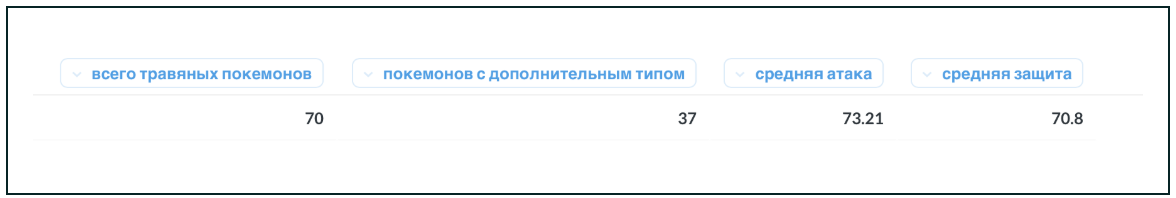

Напишите запрос, который выведет:

- количество покемонов (столбец pokemon_count),
- среднюю скорость (столбец avg_speed),
- максимальное и минимальное число очков здоровья (столбцы max_hp и min_hp)

для электрических (Electric) покемонов, имеющих дополнительный тип и показатели атаки или защиты больше 50.

In [ ]:
SELECT
    COUNT(*) AS "pokemon_count",
    AVG(speed) AS "avg_speed",
    MAX(hp) AS "max_hp",
    MIN(hp) AS "min_hp"
FROM sql.pokemon
WHERE type1 = 'Electric' and type2 IS NOT NULL and (hp > 50 or Defense >50)

# 4. Группировка

✍ Как мы помним, агрегатные функции вычисляют какой-то параметр для набора строк.

Прежде мы применяли агрегатные функции для всего вывода, а сейчас используем для различных групп строк. Поможет нам в этом ключевое слово GROUP BY.

GROUP BY используется для определения групп выходных строк, к которым могут применяться агрегатные функции.

Выведем число покемонов каждого типа.

In [ ]:
SELECT
    type1 AS pokemon_type,
    COUNT(*) AS pokemon_count
FROM sql.pokemon
GROUP BY type1
ORDER BY type1

In [ ]:
SELECT /*выбор*/
    type1 AS pokemon_type, /*столбец type1; присвоить алиас pokemon_type*/
    COUNT(*) AS pokemon_count /*подсчёт всех строк; присвоить алиас pokemon_count*/
FROM sql.pokemon /*из таблицы sql.pokemon*/
GROUP BY type1 /*группировка по столбцу type1*/
ORDER BY type1 /*сортировка по столбцу type1*/

Мы получили такой результат:

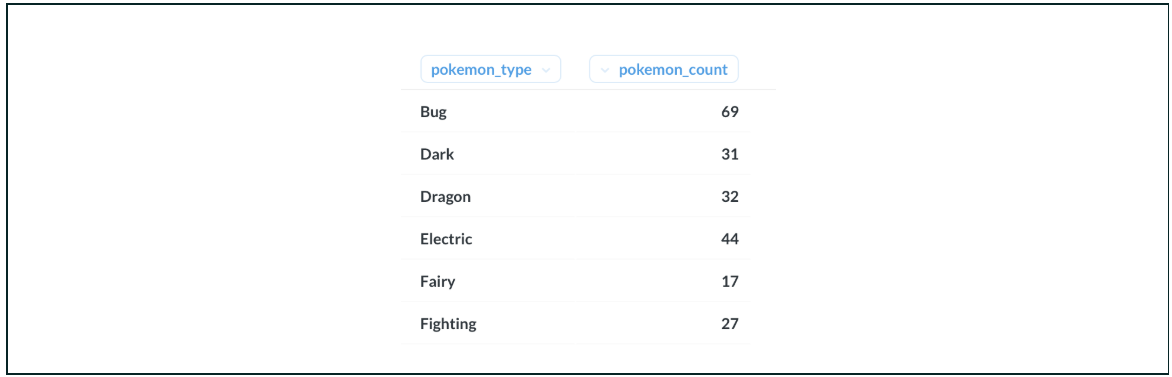

Вывод, конечно же, можно сортировать по столбцу с агрегированием.

Представим ТОП существующих типов покемонов.

In [ ]:
SELECT
    type1 AS pokemon_type,
    COUNT(*) AS pokemon_count
FROM sql.pokemon
GROUP BY pokemon_type
ORDER BY COUNT(*) DESC

In [ ]:
SELECT /*выбор*/
    type1 AS pokemon_type, /*столбец type1; присвоить алиас pokemon_type*/
    COUNT(*) AS pokemon_count /*подсчёт всех строк; присвоить алиас pokemon_count*/
FROM sql.pokemon /*из таблицы sql.pokemon*/
GROUP BY pokemon_type /*группировка по столбцу pokemon_type*/
ORDER BY COUNT(*) DESC /*сортировка в порядке убывания*/

Обратите внимание! Мы использовали в группировке не название столбца, а его алиас.

Напишите запрос, который выведет:

- число различных дополнительных типов (столбец additional_types_count),
- среднее число очков здоровья (столбец avg_hp),
- сумму показателей атаки (столбец attack_sum) в разбивке по основным типам (столбец primary_type).

Отсортируйте результат по числу дополнительных типов в порядке убывания, при равенстве — по основному типу в алфавитном порядке. Столбцы к выводу (обратите внимание на порядок!): primary_type, additional_types_count, avg_hp, attack_sum.

In [ ]:
SELECT
   type1 primary_type,
   count(DISTINCT type2) additional_types_count,
   AVG(hp) avg_hp,
   SUM(attack) attack_sum
FROM sql.pokemon
GROUP BY primary_type
ORDER BY 2 DESC, 1


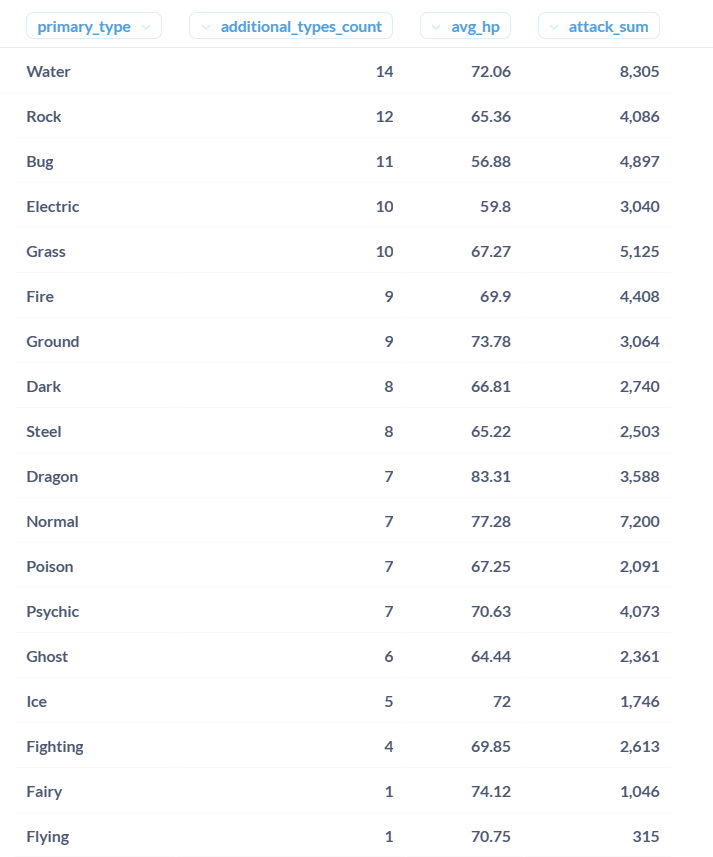

Мы можем осуществлять группировку по нескольким столбцам.

In [ ]:
SELECT
    type1 AS primary_type,
    type2 AS additional_type,
    COUNT(*) AS pokemon_count
FROM sql.pokemon
GROUP BY 1, 2
ORDER BY 1, 2 NULLS FIRST

In [ ]:
SELECT /*выбор*/
    type1 AS primary_type, /*столбец type1; присвоить алиас primary_type*/
    type2 AS additional_type, /*столбец type2; присвоить алиас additional_type*/
    COUNT(*) AS pokemon_count /*подсчёт всех строк присвоить алиас pokemon_count*/
FROM sql.pokemon /*из таблицы sql.pokemon*/
GROUP BY 1, 2 /*группировка по столбцам 1 и 2*/
ORDER BY 1, 2 NULLS FIRST /*сортировка по столбцам 1 и 2; сначала нули*/

Обратите внимание! В группировке можно указывать порядковый номер столбца так же, как мы делали это в прошлом модуле для сортировки.

GROUP BY можно использовать и без агрегатных функций. Тогда его действие будет равносильно действию DISTINCT.

Сравните выводы двух запросов:

In [ ]:
SELECT DISTINCT 
    type1
FROM sql.pokemon

In [ ]:
SELECT
    type1
FROM sql.pokemon
GROUP BY type1

#  5. Фильтрация агрегированных строк

✍ Если ключевое слово WHERE определяет фильтрацию строк до агрегирования, то для фильтрации уже агрегированных данных применяется ключевое слово HAVING.

Важно! HAVING обязательно пишется после GROUP BY.

Выведем типы покемонов и их средний показатель атаки, при этом оставим только тех, у кого средняя атака больше 90.

In [ ]:
SELECT
    type1 AS primary_type,
    AVG(attack) AS avg_attack
FROM sql.pokemon
GROUP BY primary_type 
HAVING AVG(attack) > 90

In [ ]:
SELECT /*выбор*/
    type1 AS primary_type, /*таблица type1; присвоить алиас primary_type*/
    AVG(attack) AS avg_attack /*расчёт среднего по столбцу attack; присвоить алиас avg_attack*/
FROM sql.pokemon /*из таблицы sql.pokemon*/
GROUP BY primary_type /*группировать по столбцу primary_type*/
HAVING AVG(attack) > 90 /*фильтровать по среднему значению attack, превышающему 90*/

Попробуйте удалить из запроса вывод второго столбца (со средним показателем атаки).

Что получилось?

Запрос работает и выводит только названия типов, у которых средний показатель атаки выше 90.

В HAVING вы можете использовать все те же условия, что и в WHERE.

### Вместо резюме

В общем виде синтаксис оператора SELECT, с учётом имеющихся на данный момент знаний, представляем следующим образом:

In [ ]:
SELECT [ALL | DISTINCT] список_столбцов|*
FROM список_имён_таблиц
[WHERE условие_поиска]
[GROUP BY список_имён_столбцов]
[HAVING условие_поиска]
[ORDER BY имя_столбца [ASC | DESC],…]

Обратите внимание! В квадратных скобках указаны необязательные предложения: они могут отсутствовать в операторе SELECT.

Напишите запрос, который выведет основной и дополнительный типы покемонов (столбцы primary_type и additional_type) для тех, у кого средний показатель атаки больше 100 и максимальный показатель очков здоровья меньше 80.

In [ ]:
SELECT
    type1 AS primary_type,
    type2 AS additional_type
FROM sql.pokemon
GROUP BY primary_type, additional_type
HAVING AVG(attack) > 100 and MAX(hp)<80

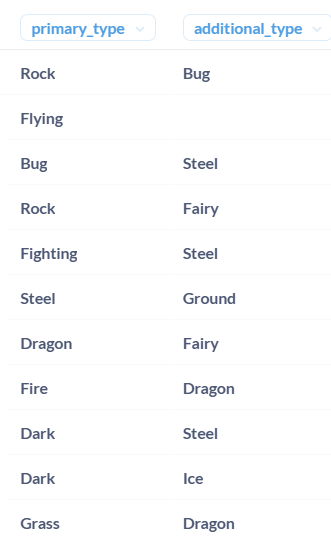

Напишите запрос, чтобы для покемонов, чьё имя (name) начинается с S, вывести столбцы с их основным типом (primary_type) и общим числом покемонов этого типа (pokemon_count). Оставьте только те типы, у которых средний показатель защиты больше 80. Выведите топ-3 типов по числу покемонов в них.

In [ ]:
SELECT
    type1 AS primary_type,
    COUNT(type1) AS pokemon_count
FROM sql.pokemon
WHERE NAME LIKE 'S%'
GROUP BY primary_type
HAVING AVG(defense) > 80
ORDER BY COUNT(*) DESC
LIMIT 3

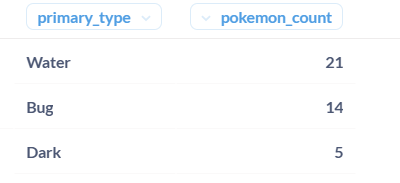

# 6. Итоги

✍ Итак, каковы наши успехи в этом модуле?

Вы познакомились с агрегатными функциями и научились:

- считать количество строк, сумму, минимум, максимум, среднее по значениям таблицы;
- выводить агрегированные значения в разных разрезах;
- фильтровать по агрегированным значениям.

И в довершение итогов напомним структуру запроса, который мы можем составить с учётом новых знаний:

In [ ]:
SELECT
    столбец1 AS новое_название,
    столбец2,
    АГРЕГАТ(столбец3)
FROM таблица
WHERE (условие1 OR условие2)
    AND условие3
GROUP BY столбец1, столбец2
HAVING АГРЕГАТ(столбец3) > 5
ORDER BY сортировка1, сортировка2
OFFSET 1 LIMIT 2

И в довершение итогов напомним структуру запроса, который мы можем составить с учётом новых знаний:

In [ ]:
SELECT
    столбец1 AS новое_название,
    столбец2,
    АГРЕГАТ(столбец3)
FROM таблица
WHERE (условие1 OR условие2)
    AND условие3
GROUP BY столбец1, столбец2
HAVING АГРЕГАТ(столбец3) > 5
ORDER BY сортировка1, сортировка2
OFFSET 1 LIMIT 2

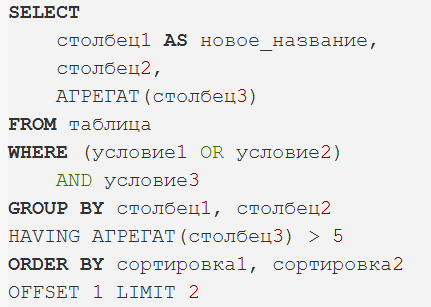

✍ А теперь давайте проверим полученные знания на практике ↓

Сколько различных значений показателей атаки есть у покемонов с типом Water (основным или дополнительным)?

In [ ]:
SELECT
    COUNT(DISTINCT attack) 
FROM sql.pokemon
WHERE type1 = 'Water' or type2 = 'Water'

Напишите запрос, который выведет основной и дополнительный типы покемонов и средние значения по каждому показателю (столбцы avg_hp, avg_attack, avg_defense, avg_speed).Оставьте только те пары типов, у которых сумма этих четырёх показателей более 400.

In [ ]:
SELECT
    type1 AS primary_type,
    type2 AS additional_type,
    AVG(hp) AS avg_hp,
    AVG(attack) AS avg_attack,
    AVG(defense) AS avg_defense,
    AVG(speed) AS avg_speed
FROM sql.pokemon
GROUP BY type1, type2
HAVING (AVG(hp) + AVG(attack) + AVG(defense) + AVG(speed)) > 400

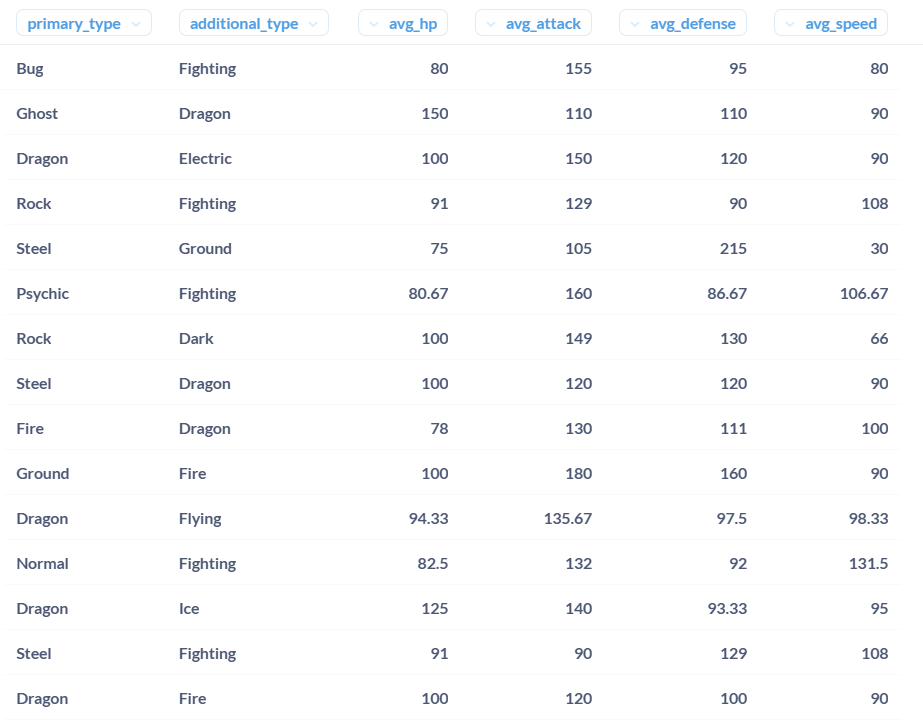

Напишите запрос, который выведет столбцы с основным типом покемона и общим количеством покемонов этого типа. Учитывайте только тех покемонов, у кого или показатель атаки, или показатель защиты принимает значение между 50 и 100 включительно. Оставьте только те типы покемонов, у которых максимальный показатель здоровья не больше 125. Выведите только тот тип, который находится на пятом месте по количеству покемонов.

In [ ]:
SELECT
    type1 AS primary_type,
    COUNT(type1) AS pokemon_count
FROM sql.pokemon
WHERE attack BETWEEN 50 AND 100 or defense BETWEEN 50 AND 100
GROUP BY primary_type
HAVING MAX(hp) <= 125
ORDER BY COUNT(type1) DESC
OFFSET 4 LIMIT 1


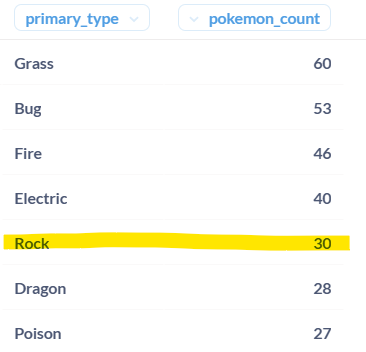